# Exploration of the dataset with human balance evaluations

Marcos Duarte

Here is an exploration on the data set of human balance evaluations available at [https://zenodo.org/record/47671](https://zenodo.org/record/47671).  
This data set has data of quantitative and qualitative evaluations of 231 subjects. See the data set website for more details.

First, let's import the necessary Pythons libraries and configure the environment:

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import pandas as pd
pd.set_option('precision', 2)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set_context("notebook", font_scale=1.4,
                rc={'font.size': 16, 'lines.linewidth': 1, 'lines.markersize': 8, 'axes.titlesize': 'x-large'})
import glob
import sys, os
sys.path.insert(1, r'./../functions')

# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

import qgrid  # pip install git+https://github.com/quantopian/qgrid
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to /nbextensions folder
#qgrid.set_defaults(remote_js=True, precision=2)  # Set default options by calling "set_defaults" (optional)

from AMTIbsf import loadbsf
from psd import psd
from hyperellipsoid import hyperellipsoid

## Load file with metadata about the data set

In [2]:
path = r'./../../../X/BDB/'
fname = 'BDSinfo.txt'
BDSinfo = pd.read_csv(os.path.join(path, fname), sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(BDSinfo.Subject)), BDSinfo.shape[0], BDSinfo.shape[1]))

Information of 231 subjects loaded (2742 rows, 52 columns).


Let's add two columns to these data, one for the Body Mass Index (BMI) and other to denote the age group (Younger, Y, or Older, O) based on the subjects' age in years. Let's classify the older group as subjects with at least 60 years old.

In [3]:
BMI = BDSinfo['Weight'].values/(BDSinfo['Height'].values/100)**2
BDSinfo['BMI'] = BMI  # BDSinfo.loc[:, 'BMI'] = pd.Series(BMI, index=BDSinfo.index)
BDSinfo['AgeGroup'] = BDSinfo['Age']
BDSinfo.AgeGroup.where(BDSinfo.Age<60, 'Old', inplace=True)
BDSinfo.AgeGroup.where(BDSinfo.Age>=60, 'Young', inplace=True)

## Age group and gender

The BDSinfo file has 2742 rows for 231 subjects because there are 12 rows for each subject related to the 12 experimental trials (but there is a total of 30 trials missing). For now, to analyze the subjects's characteristics we can drop the additional rows for each subject:

In [4]:
#info = infos.drop(labels=['Date', 'Trial', 'Vision', 'Surface'], axis=1)
info = BDSinfo.drop_duplicates(subset='Subject', inplace=False)
print('Number of subjects per group (N=%d):' %len(info))
display(info[['Subject', 'AgeGroup', 'Gender']].groupby(['AgeGroup', 'Gender']).count())

Number of subjects per group (N=231):


Subject
AgeGroup Gender         
Old      F            75
         M            29
Young    F            63
         M            64

In [5]:
print('Mean age values across subjects per group and gender')
display(info.groupby(['AgeGroup', 'Gender'])['Age'].mean())
print('STD age values across subejcts per group and gender')
display(info.groupby(['AgeGroup', 'Gender'])['Age'].std())
qgrid.show_grid(info.iloc[:, :10])

Mean age values across subjects per group and gender


AgeGroup  Gender
Old       F         71.77
          M         69.80
Young     F         27.98
          M         30.80
Name: Age, dtype: float64

STD age values across subejcts per group and gender


AgeGroup  Gender
Old       F          6.88
          M          6.20
Young     F          7.80
          M         10.05
Name: Age, dtype: float64

## Disability and illness

Of the 231 subjects (115 young adults and 106 elderly adults), 22 of them were classified as a person with disability (PWD) and 142 subjects declared to have an illness:

In [6]:
display(info[['Subject', 'AgeGroup', 'PWD', 'Illness']].groupby(['AgeGroup', 'PWD', 'Illness']).count())

Subject
AgeGroup PWD Illness         
Old      No  No            14
             Yes           74
         Yes No             2
             Yes           14
Young    No  No            71
             Yes           50
         Yes No             2
             Yes            4

Because there were more disabilities in the older group, 16 vs. 6, let's select only people without disability for the comparison from now on:

In [7]:
info = info.ix[info.PWD=='No']

## Age, weight, height, and BMI 

Let's visualize the age, weight, height, and BMI values by gender of the subjects:

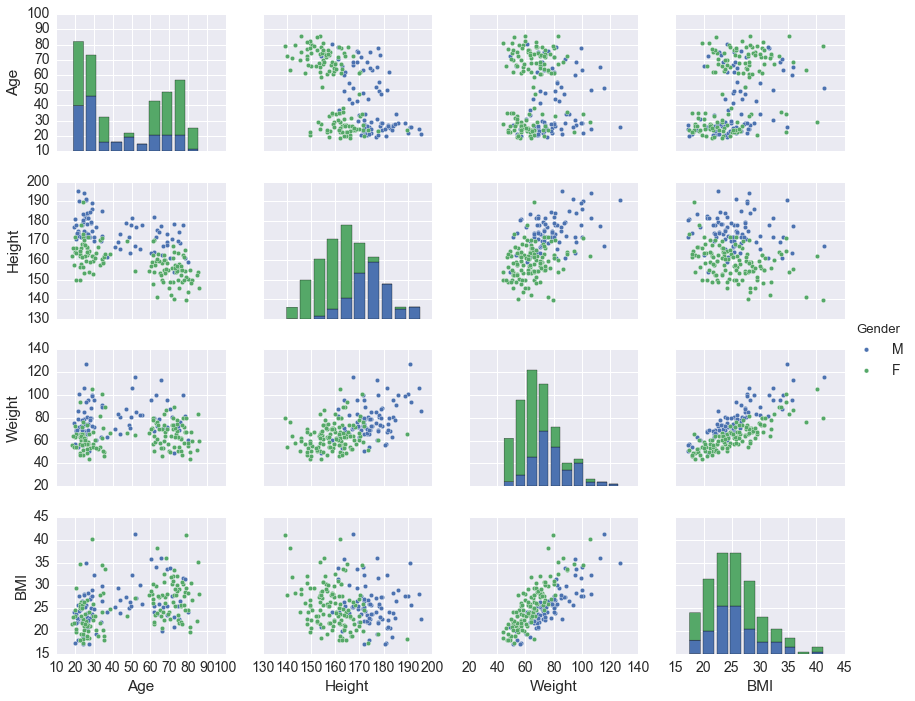

In [8]:
sns.pairplot(info[['Age', 'Gender', 'Height', 'Weight', 'BMI']], hue='Gender', size=2.5, aspect=1.2)
plt.show()

From figure above, we can see a biomodal distribution for the age characteristic; data are from young subjects, mostly between 20 and 30 yrs. old, and from elderly subjects, between 60 and 80 yrs. old. Men are slightly taller and heavier than women but they seem to have similar BMI.

## Fallers

Let's see how many subjects fell at least once in the last 12 months:

In [9]:
info[['AgeGroup', 'Falls12m']][info.Falls12m > 0].groupby(['AgeGroup']).count()

,Falls12m
AgeGroup,
Old,25
Young,28


So, surprisingly the number of young and elderly subjects who fell at least once in the last 12 months are similar (28% of tle elderly adults and 23% of the young adults fell).

 ### Qualitative evaluations
 
 Let's see the results for the Short Falls Efficacy Scale International test (FES-I), Mini Balance Evaluation Systems Test (Mini-BESTest), International Physical Activity Questionnaire Short Version (IPAQ); and Trail Making Test (TMT).

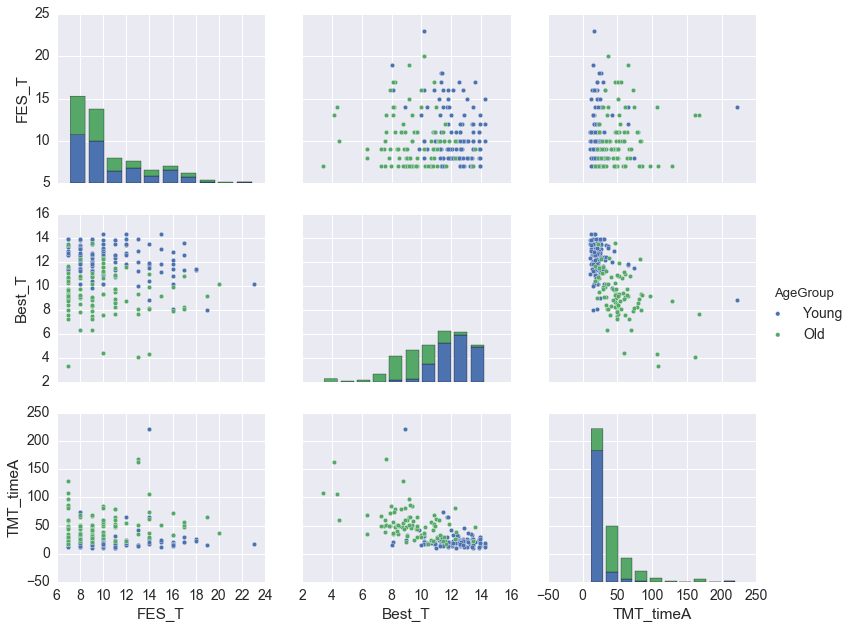

In [10]:
sns.pairplot(info[['AgeGroup', 'FES_T', 'Best_T', 'TMT_timeA']], hue='AgeGroup', size=3, aspect=1.2)
plt.show()

To be continued...